In [18]:
from skimage.io import imread
from skimage.filters import threshold_otsu
import matplotlib.pyplot as plt

In [22]:
car_image = imread("car.jpeg", as_gray=True)
print(car_image.shape)

(1360, 2048)


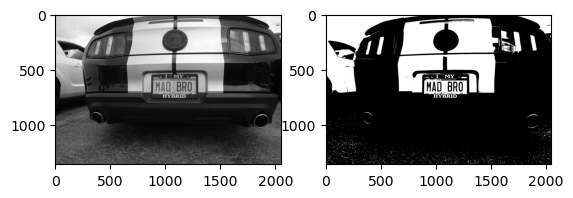

In [23]:
gray_car_image = car_image * 255
fig,(ax1,ax2) = plt.subplots(1,2)
ax1.imshow(gray_car_image,cmap="gray")
threshold_value = threshold_otsu(gray_car_image)
binary_car_image = gray_car_image > threshold_value
ax2.imshow(binary_car_image,cmap="gray")
plt.show()

In [24]:
from skimage import measure
from skimage.measure import regionprops
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [25]:
pip install shapely

Note: you may need to restart the kernel to use updated packages.


In [26]:
import localization
from skimage import measure

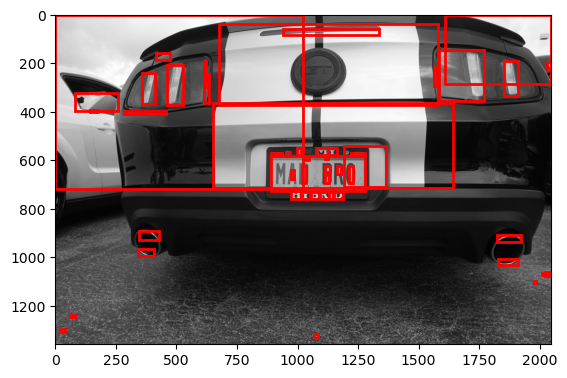

In [27]:
label_image = measure.label(binary_car_image)
fig,(ax1) = plt.subplots(1)
ax1.imshow(gray_car_image,cmap="gray")

for region in measure.regionprops(label_image):
    if region.area < 50:
        continue


    minRow, minCol, maxRow, maxCol = region.bbox
    rectBorder = patches.Rectangle(
        (minCol, minRow), 
        maxCol - minCol, 
        maxRow - minRow, 
        edgecolor="red", 
        linewidth=2, 
        fill=False
    )
    ax1.add_patch(rectBorder)

plt.show()

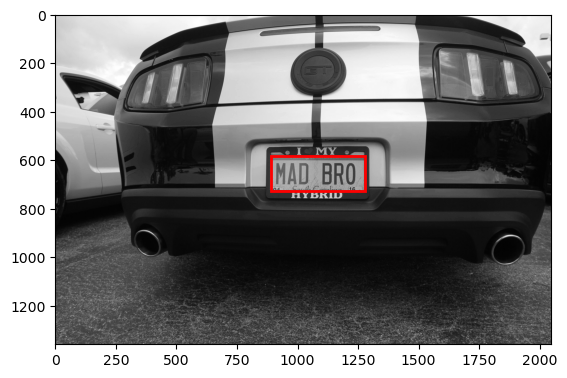

In [28]:
plate_dimensions = (0.04*label_image.shape[0], 0.14*label_image.shape[0], 0.12*label_image.shape[1], 0.3*label_image.shape[1])
min_height, max_height, min_width, max_width = plate_dimensions
plate_objects_cordinates = []
plate_like_objects = []
fig, (ax1) = plt.subplots(1)
ax1.imshow(gray_car_image, cmap="gray");

for region in regionprops(label_image):
    if region.area < 50:
  
        continue


    min_row, min_col, max_row, max_col = region.bbox
    region_height = max_row - min_row
    region_width = max_col - min_col
    if region_height >= min_height and region_height <= max_height and region_width >= min_width and region_width <= max_width and region_width > region_height:
        plate_like_objects.append(binary_car_image[min_row:max_row,
                                  min_col:max_col])
        plate_objects_cordinates.append((min_row, min_col,
                                              max_row, max_col))
        rectBorder = patches.Rectangle((min_col, min_row), max_col-min_col, max_row-min_row, edgecolor="red", linewidth=2, fill=False)
        ax1.add_patch(rectBorder)

plt.show()

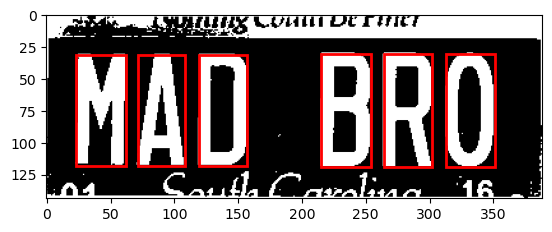

Sorted x-coordinates: [23, 71, 119, 215, 264, 313]


In [41]:
license_plate = np.invert(plate_like_objects[0])
labelled_plate = measure.label(license_plate)

# Display the license plate
fig, ax1 = plt.subplots(1)
ax1.imshow(license_plate, cmap="gray")

character_dimensions = (0.4 * license_plate.shape[0], 0.66 * license_plate.shape[0],
                        0.03 * license_plate.shape[1], 0.125 * license_plate.shape[1])
min_height, max_height, min_width, max_width = character_dimensions

characters = []
column_list = []

for regions in regionprops(labelled_plate):
    y0, x0, y1, x1 = regions.bbox
    region_height = y1 - y0
    region_width = x1 - x0

    if (region_height > min_height and region_height < max_height and
        region_width > min_width and region_width < max_width):
        
        roi = license_plate[y0:y1, x0:x1]
        
        rect_border = patches.Rectangle((x0, y0), x1 - x0, y1 - y0, edgecolor="red", linewidth=2, fill=False)
        ax1.add_patch(rect_border)
        
        resized_char = resize(roi, (20, 20))
        
        characters.append((resized_char, x0))
        column_list.append(x0)

plt.show()

characters_sorted = sorted(characters, key=lambda x: x[1])

sorted_characters = [char[0] for char in characters_sorted]
sorted_x_coords = [char[1] for char in characters_sorted]

print("Sorted x-coordinates:", sorted_x_coords)

In [42]:
import os
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
import joblib
from skimage.io import imread
from skimage.filters import threshold_otsu

In [43]:
current_dir = os.getcwd()
model_dir = os.path.join(current_dir, 'models/svc/svc.pkl')
model = joblib.load(model_dir)

In [46]:
classification_result = []

for each_character in sorted_characters:
    each_character_flat = each_character.reshape(1, -1)
    
    result = model.predict(each_character_flat)
    
    classification_result.append(result)

print(classification_result)

plate_string = ''.join([res[0] for res in classification_result])
print(plate_string)

[array(['M'], dtype='<U1'), array(['A'], dtype='<U1'), array(['D'], dtype='<U1'), array(['B'], dtype='<U1'), array(['R'], dtype='<U1'), array(['0'], dtype='<U1')]
MADBR0


In [45]:

plate_string = ''
for eachPredict in classification_result:
    plate_string += eachPredict[0]

print(plate_string)


MADBR0
